1. fueleco column으로 자유롭게 graph

In [2]:
import pandas as pd
import numpy as np

In [3]:
fueleco = pd.read_csv('data/vehicles.csv.zip')

fueleco.select_dtypes(object).columns

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [4]:
fueleco.select_dtypes('object').describe().T

,count,unique,top,freq
drive,42232,7,Front-Wheel Drive,14776
eng_dscr,26887,562,(FFS),8827
fuelType,43418,14,Regular,27381
fuelType1,43418,6,Regular Gasoline,28828
make,43418,139,Chevrolet,4159
model,43418,4375,F150 Pickup 2WD,226
mpgData,43400,2,N,29726
trany,43407,40,Automatic 4-spd,11048
VClass,43418,34,Compact Cars,6086
guzzler,2558,3,G,1579


<AxesSubplot:>

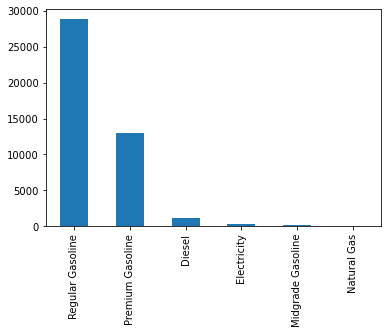

In [5]:
fueleco.fuelType1.value_counts().plot(kind='bar')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='atvType'>

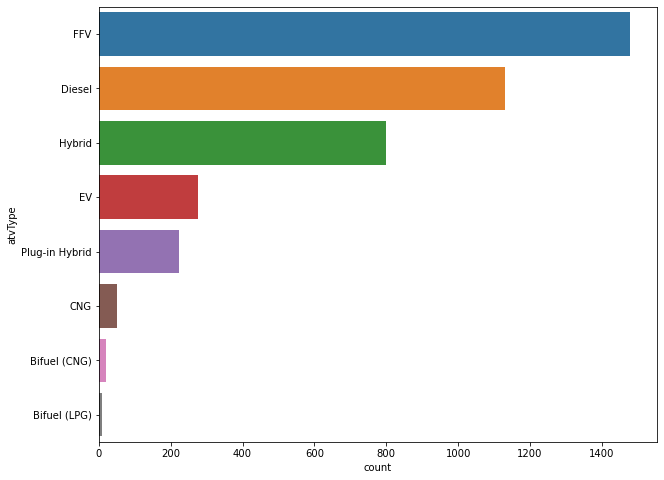

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='atvType', data=(fueleco), order=fueleco.atvType.value_counts().index)

<AxesSubplot:xlabel='count', ylabel='evMotor'>

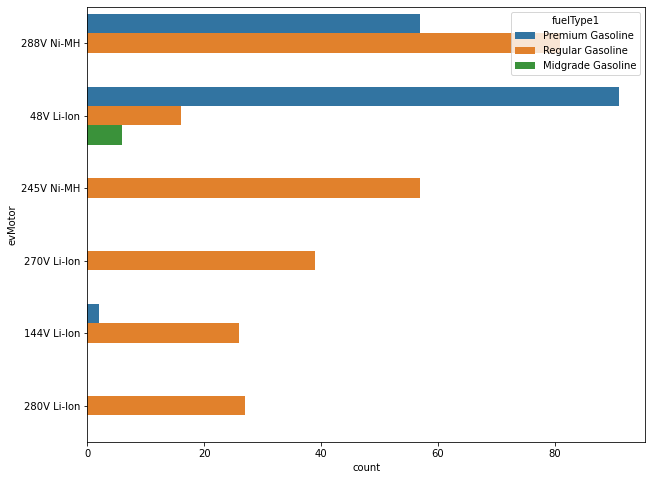

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.evMotor.value_counts().index[:6]
sns.countplot(y='evMotor', 
              data=(fueleco[fueleco.evMotor.isin(top_n)]), 
              hue='fuelType1', 
              order=fueleco.evMotor.value_counts().index[:6]
             )

In [20]:
fueleco.select_dtypes(include = 'number').describe().head(6)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,43418.000000,43418.000000,43418.0,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,...,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000
mean,17.132865,0.221869,0.0,0.066276,18.654521,6.916080,0.780805,0.643413,0.000497,0.471792,...,23.613608,1.028003,34.274373,1.270942,2002.536022,-3992.174904,0.014105,0.229836,0.231563,0.229628
std,4.678481,1.142116,0.0,0.739613,8.750168,12.657711,6.050073,5.939123,0.038230,4.683147,...,12.441254,8.528132,12.460440,8.681490,11.650912,3369.439953,0.301393,3.526150,3.405325,3.449732
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-29750.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.400000,0.000000,27.751750,0.000000,1992.000000,-6000.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.639950,0.000000,33.300000,0.000000,2003.000000,-4000.000000,0.000000,0.000000,0.000000,0.000000


2. 수치형 데이터선택해서 spearman correlation 시각화

<AxesSubplot:>

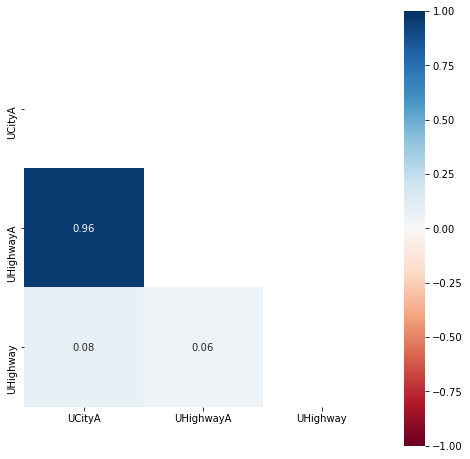

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = fueleco[['UCityA', 'UHighwayA', 'UHighway']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, fmt='.2f', annot=True, ax=ax, cmap='RdBu', vmin=-1, vmax=1, square=True)